In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
conn=sqlite3.connect('vendor.db')
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorName,VendorNumber,Brand,PurchasePrice,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,PERNOD RICARD USA,17035,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,DIAGEO NORTH AMERICA INC,3960,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,DIAGEO NORTH AMERICA INC,3960,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05


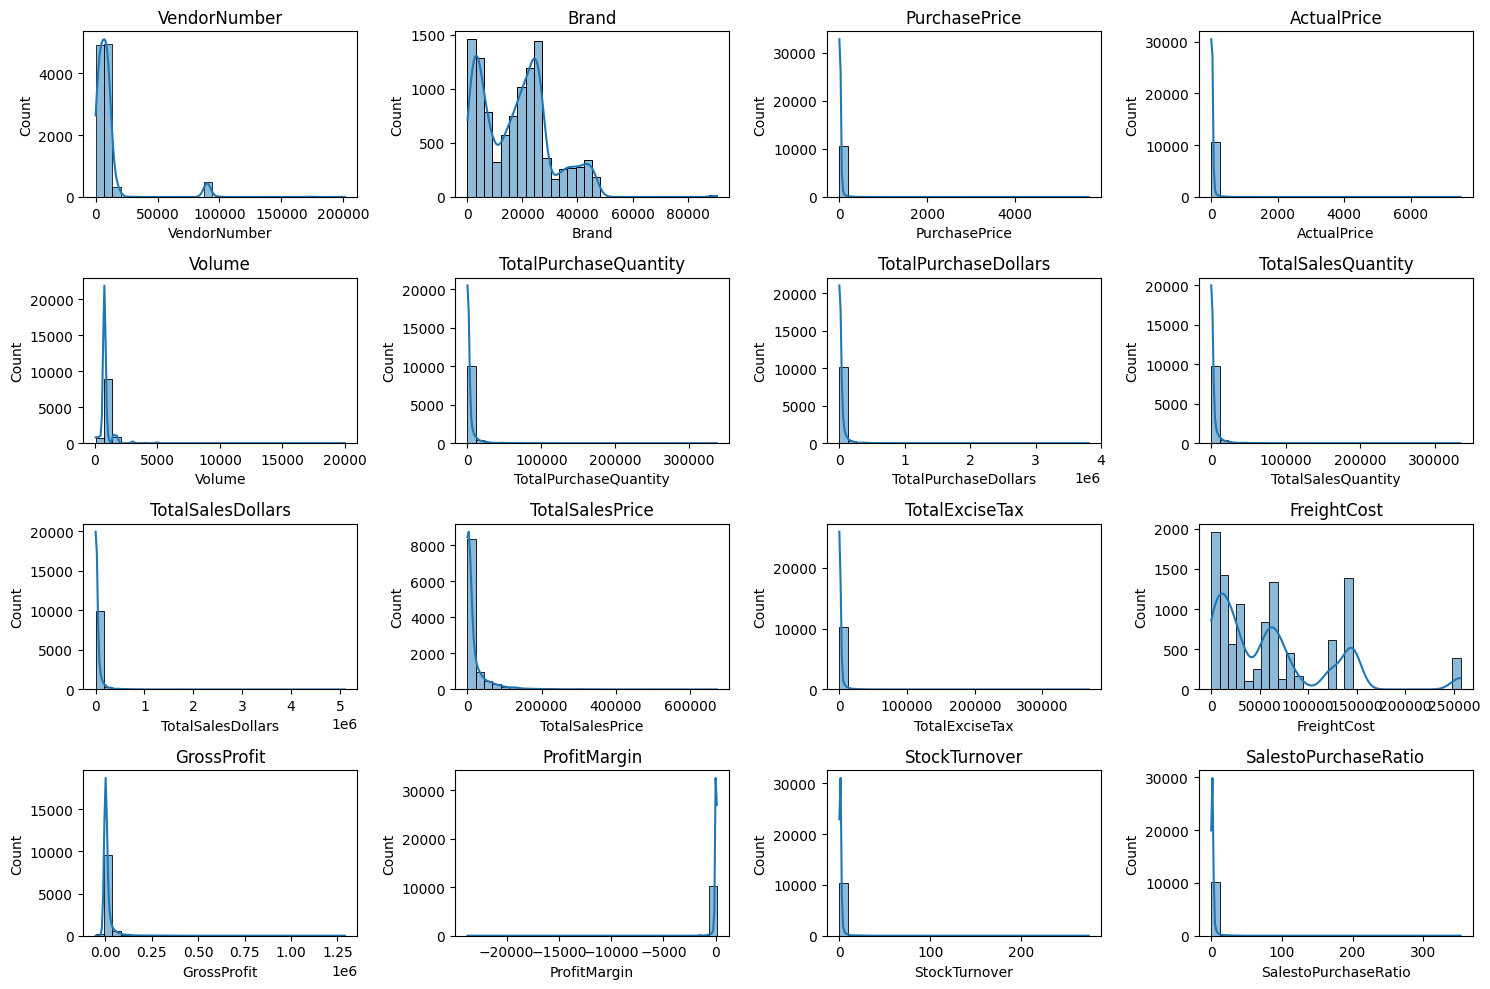

In [5]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.show

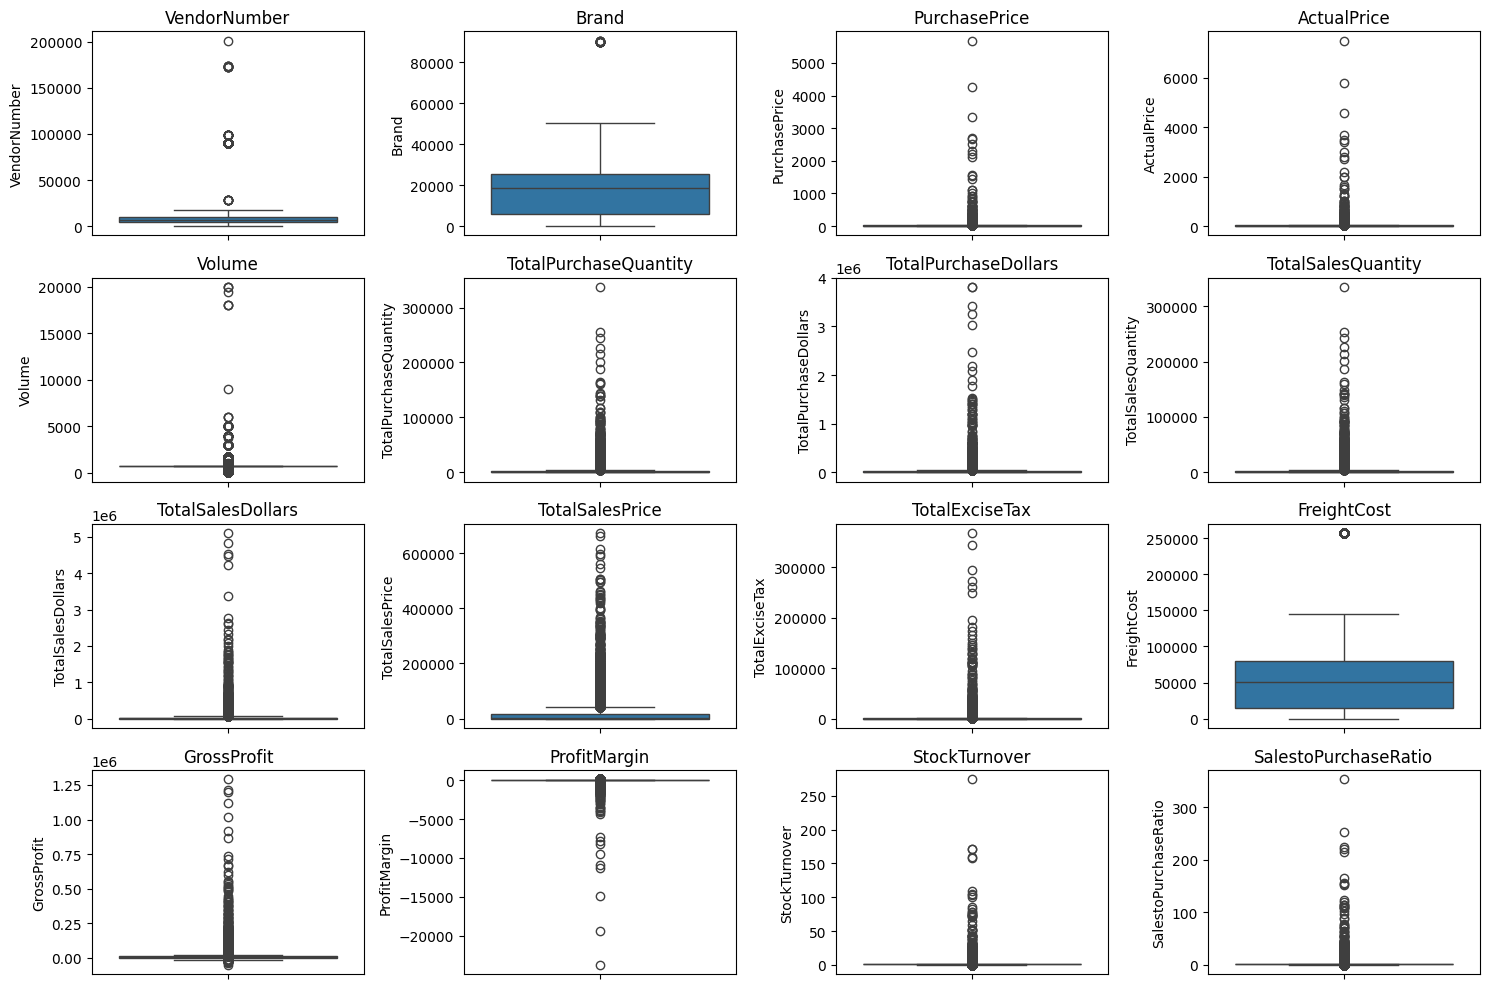

In [6]:
#Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Insights from Statistical Analysis:
Negative and Zero Values:
Gross Profit: The lowest observed value is -52,002.78, which suggests losses. This may occur when products are sold below their cost price or at heavy discounts.

Profit Margin: A minimum of negative infinity implies that, for some transactions, either no revenue was generated or the cost exceeded the revenue.

Sales Quantity and Revenue: Some entries have a value of 0, meaning certain items were acquired but never sold — possibly indicating unsold inventory or obsolete stock.

Outliers Identified by Large Standard Deviations:
Purchase and Selling Prices: Maximum values (5,681.81 & 7,499.99) are far above the averages (24.39 & 35.64), pointing to the presence of high-end or premium-priced products.

Freight Charges: Wide fluctuations from 0.09 up to 257,032.07 could indicate inefficiencies in logistics or the handling of very large shipments.

Stock Turnover Ratio: With values between 0 and 274.5, some products are turning over very rapidly, while others remain unsold. A ratio above 1 implies sales are possibly being met using previously stocked inventory.



In [7]:
df=pd.read_sql_query("""SELECT *
                     FROM vendor_sales_summary
                     where GrossProfit>0
                     AND ProfitMargin>0
                     And TotalSalesQuantity>0""",conn)

In [8]:
df

,VendorName,VendorNumber,Brand,PurchasePrice,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,PERNOD RICARD USA,17035,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,DIAGEO NORTH AMERICA INC,3960,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,DIAGEO NORTH AMERICA INC,3960,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,WINE GROUP INC,9815,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,SAZERAC CO INC,8004,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,HEAVEN HILL DISTILLERIES,3924,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,DIAGEO NORTH AMERICA INC,3960,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


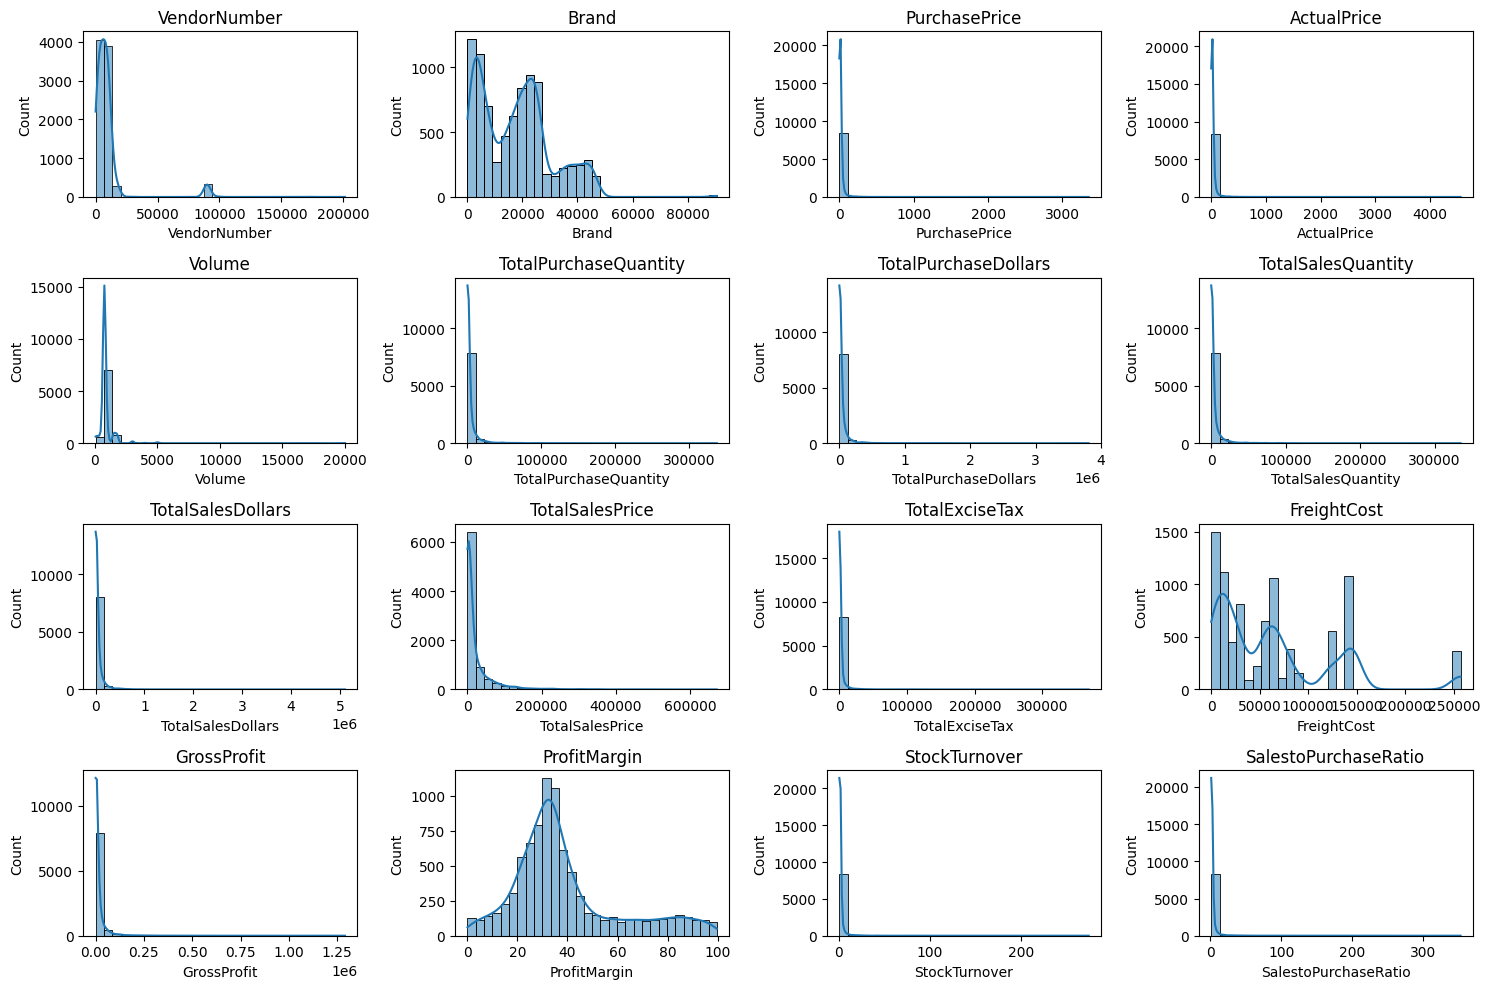

In [9]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.show

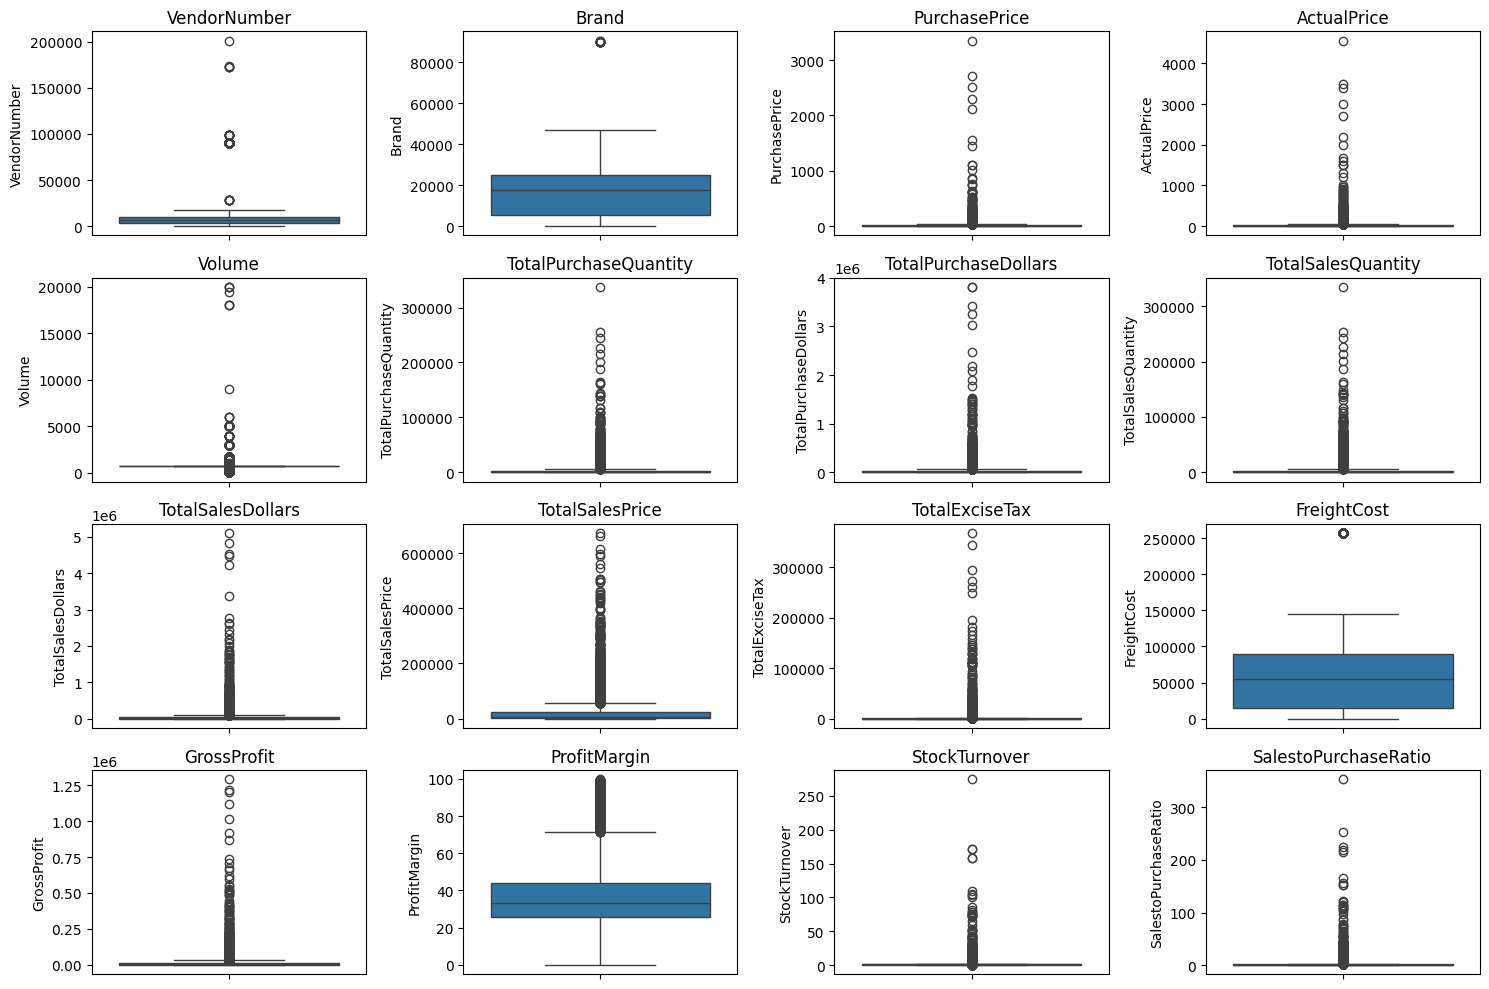

In [10]:
#Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

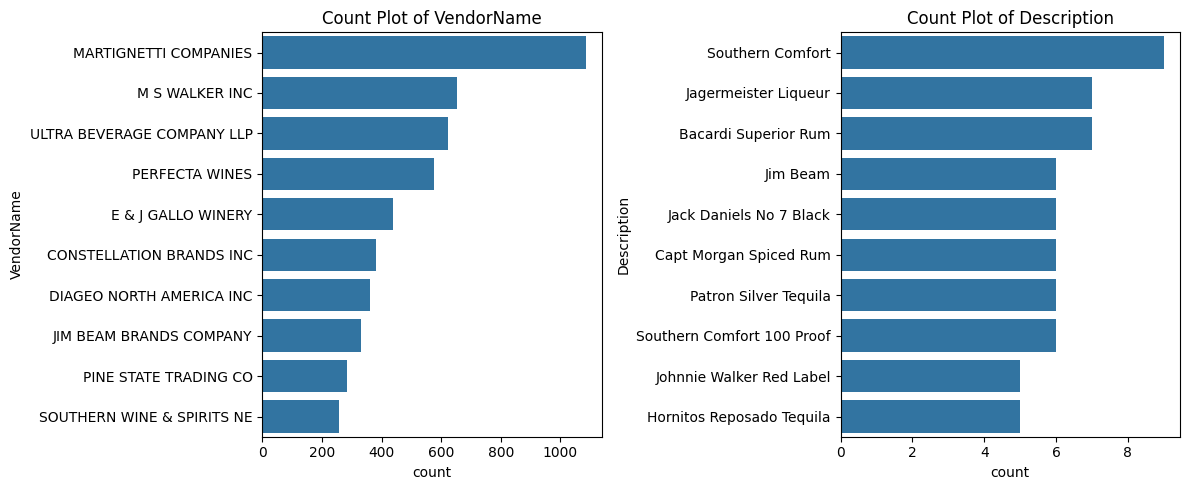

In [11]:
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

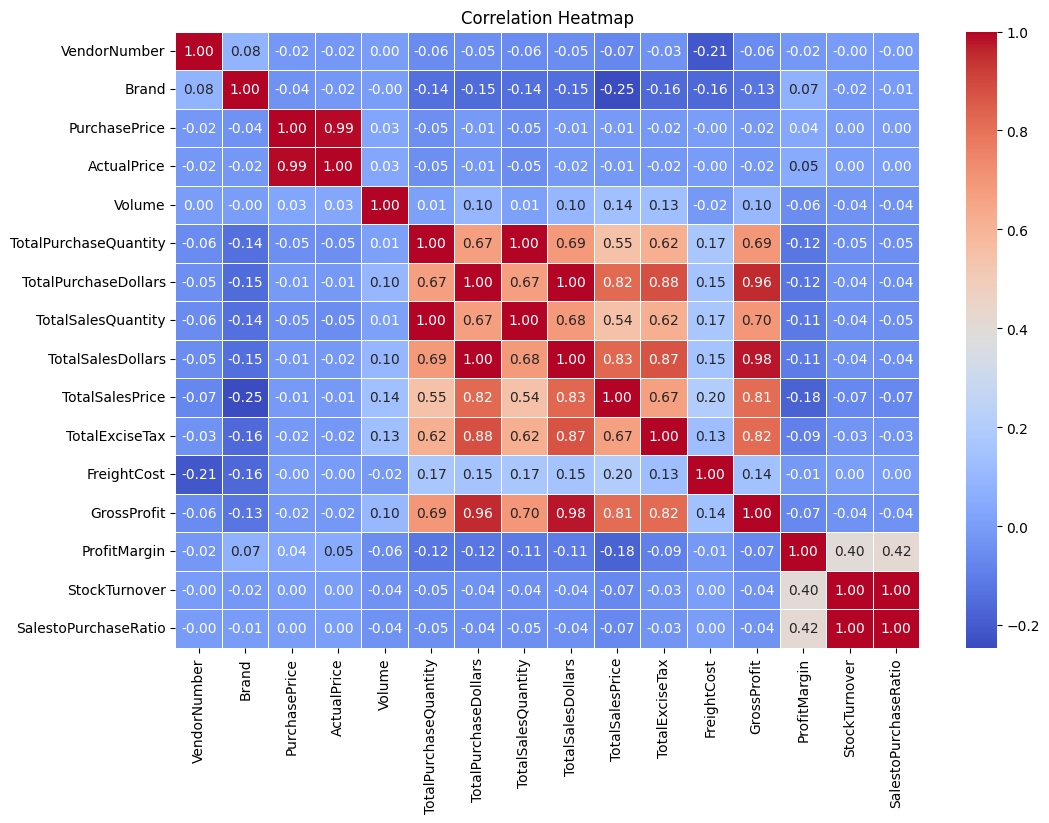

In [12]:
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Insights from Correlation Analysis:
The relationship between Purchase Price and both Total Sales Revenue (-0.012) and Gross Profit (-0.016) appears minimal, indicating that changes in purchase price have little to no direct influence on overall revenue or profit.

There's a very strong positive correlation (0.999) between total purchase quantity and total sales quantity, suggesting smooth inventory flow and effective stock management.

A moderate negative correlation (-0.179) between profit margin and total sales price implies that higher selling prices may be linked to shrinking margins — possibly due to pressure from competitors or market limitations.

Stock Turnover shows a slightly negative link with Gross Profit (-0.038) and Profit Margin (-0.055), indicating that moving products faster doesn’t always guarantee better profitability.



**Data Analysis**

Identify Brands that needs Promotional or Pricing Adjustments which exhibits lower sales performance but higher profit margins.

In [13]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [14]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(560.299)

In [16]:
high_margin_threshold

np.float64(64.97017552750113)

In [17]:
#filter brand with low sales but high profit margins
target_brands=brand_performance=brand_performance[
                                (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
                                (brand_performance['ProfitMargin']>= high_margin_threshold)]
print("Brand with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Brand with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [24]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000] #for better visualization

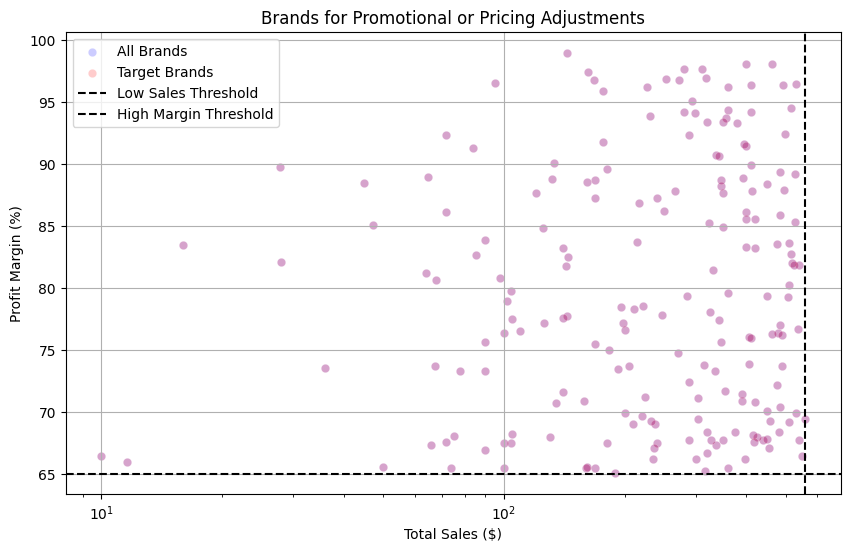

In [25]:
plt.figure(figsize=(10, 6))

# Scatter plots
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands", alpha=0.2)

# Threshold lines
plt.axvline(x=low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')
plt.axhline(y=high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')

# Use log scale if x-axis is skewed
plt.xscale('log')

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

# Legend and grid
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#which vendors and brands demonstrate the highest sales performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [28]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [29]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [33]:
#which vendor contribute the most to total purchase dollars?
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'

}).reset_index()

In [38]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [45]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)*100

In [46]:
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INCDIAGEO NORTH AMERICA I...,5009.72M,1789.29M,6799.01M,16.0
57,MARTIGNETTI COMPANIESMARTIGNETTI COMPANIESMART...,2550.21M,1382.83M,3933.04M,8.0
68,PERNOD RICARD USAPERNOD RICARD USAPERNOD RICAR...,2385.12M,821.20M,3206.32M,8.0
46,JIM BEAM BRANDS COMPANYJIM BEAM BRANDS COMPANY...,2349.43M,792.87M,3142.30M,8.0
6,BACARDI USA INCBACARDI USA INCBACARDI USA INCB...,1743.20M,742.28M,2485.48M,6.0
20,CONSTELLATION BRANDS INCCONSTELLATION BRANDS I...,1527.37M,894.50M,2421.87M,5.0
11,BROWN-FORMAN CORPBROWN-FORMAN CORPBROWN-FORMAN...,1323.89M,500.83M,1824.72M,4.0
30,E & J GALLO WINERYE & J GALLO WINERYE & J GALL...,1206.85M,633.14M,1839.99M,4.0
106,ULTRA BEVERAGE COMPANY LLPULTRA BEVERAGE COMPA...,1116.71M,533.55M,1650.25M,4.0
53,M S WALKER INCM S WALKER INCM S WALKER INCM S ...,976.43M,494.21M,1470.65M,3.0


In [47]:
vendor_performance.shape

(119, 5)

In [48]:
top_vendors['PurchaseContribution%'].sum()

np.float64(66.0)

In [52]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INCDIAGEO NORTH AMERICA I...,5009.72M,1789.29M,6799.01M,16.0,16.0
57,MARTIGNETTI COMPANIESMARTIGNETTI COMPANIESMART...,2550.21M,1382.83M,3933.04M,8.0,24.0
68,PERNOD RICARD USAPERNOD RICARD USAPERNOD RICAR...,2385.12M,821.20M,3206.32M,8.0,32.0
46,JIM BEAM BRANDS COMPANYJIM BEAM BRANDS COMPANY...,2349.43M,792.87M,3142.30M,8.0,40.0
6,BACARDI USA INCBACARDI USA INCBACARDI USA INCB...,1743.20M,742.28M,2485.48M,6.0,46.0
20,CONSTELLATION BRANDS INCCONSTELLATION BRANDS I...,1527.37M,894.50M,2421.87M,5.0,51.0
11,BROWN-FORMAN CORPBROWN-FORMAN CORPBROWN-FORMAN...,1323.89M,500.83M,1824.72M,4.0,55.0
30,E & J GALLO WINERYE & J GALLO WINERYE & J GALL...,1206.85M,633.14M,1839.99M,4.0,59.0
106,ULTRA BEVERAGE COMPANY LLPULTRA BEVERAGE COMPA...,1116.71M,533.55M,1650.25M,4.0,63.0
53,M S WALKER INCM S WALKER INCM S WALKER INCM S ...,976.43M,494.21M,1470.65M,3.0,66.0


In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()
